# Problem Statement:
Credit card fraud is a significant concern for financial institutions and
consumers. Fraudulent activities cause substantial losses and impact
customer trust. This project aims to perform Exploratory Data Analysis
(EDA) on credit card transaction data to identify patterns and anomalies
that may indicate fraudulent behav       i
ones.

Students will analyze the dataset to gain insights into transaction patterns
and potential factors distinguishing fraudulent transactions from legitimate
ones.

## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [3]:
df = pd.read_csv("creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA Questions

### 1. How many rows and columns are in the dataset?

In [6]:
df.shape

(284807, 31)

### 2. What are the column names and their data types?

In [7]:
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


### 3. Are there any missing or null values in the dataset?

In [8]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### 4. How many transactions are fraudulent, and how many are legitimate?

In [14]:
transaction_counts = df['Class'].value_counts()

print(f"Legitimate transactions (Class 0): {transaction_counts[0]}")
print(f"Fraudulent transactions (Class 1): {transaction_counts[1]}")

Legitimate transactions (Class 0): 284315
Fraudulent transactions (Class 1): 492


### 5. What percentage of transactions are fraudulent?

In [15]:
total_transactions = len(df)
fraudulent_transactions = df['Class'].value_counts().get(1, 0)
fraudulent_percentage = (fraudulent_transactions / total_transactions) * 100

print(f"Percentage of fraudulent transactions: {fraudulent_percentage:.2f}%")

Percentage of fraudulent transactions: 0.17%


### 6. What are the minimum, maximum, mean, and median values for numerical columns like Amount?

In [17]:
min_amount = df['Amount'].min()
max_amount = df['Amount'].max()
mean_amount = df['Amount'].mean()
median_amount = df['Amount'].median()

print(f"Amount column statistics:")
print(f"Minimum: {min_amount}")
print(f"Maximum: {max_amount}")
print(f"Mean: {mean_amount}")
print(f"Median: {median_amount}")

Amount column statistics:
Minimum: 0.0
Maximum: 25691.16
Mean: 88.34961925093133
Median: 22.0


### 7. What is the maximum transaction amount in the dataset, and is it fraudulent? 

In [18]:
max_amount = df['Amount'].max()
max_amount_row = df[df['Amount'] == max_amount]
is_fraudulent = max_amount_row['Class'].values[0]
print(f"The maximum transaction amount is {max_amount}, and it is {'fraudulent' if is_fraudulent else 'legitimate'}.")

The maximum transaction amount is 25691.16, and it is legitimate.


### 8. Can we create a bar chart showing the count of fraudulent vs. legitimate transactions? 

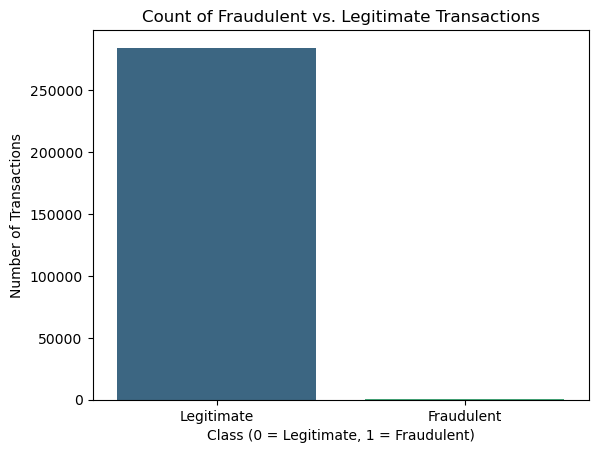

In [19]:
# Count the transactions for each class
transaction_counts = df['Class'].value_counts()

# Create a bar chart
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")
plt.title("Count of Fraudulent vs. Legitimate Transactions")
plt.xlabel("Class (0 = Legitimate, 1 = Fraudulent)")
plt.ylabel("Number of Transactions")
plt.xticks([0, 1], ["Legitimate", "Fraudulent"])
plt.show()

### 9. What does the histogram of transaction amounts look like? 

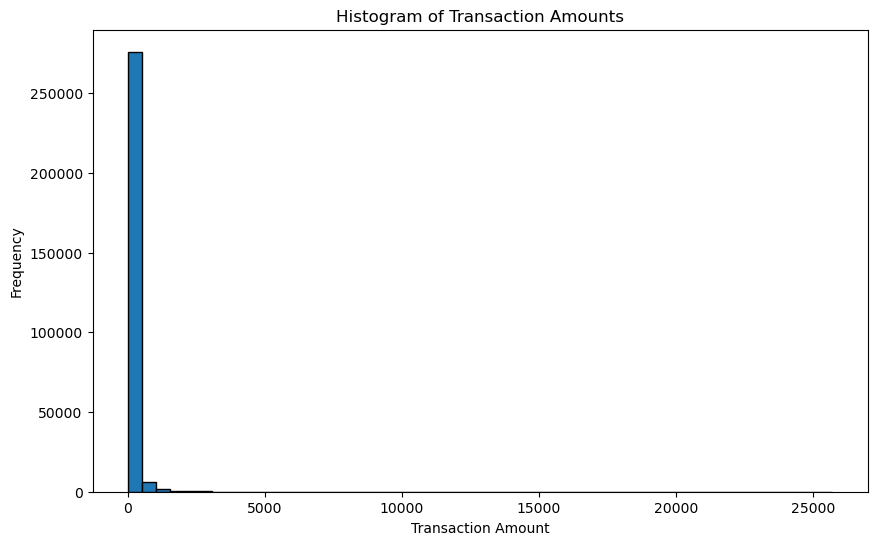

In [21]:
# Create a histogram of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50, edgecolor='k')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### 10. Can we use a heatmap to visualize the correlation between numerical features?


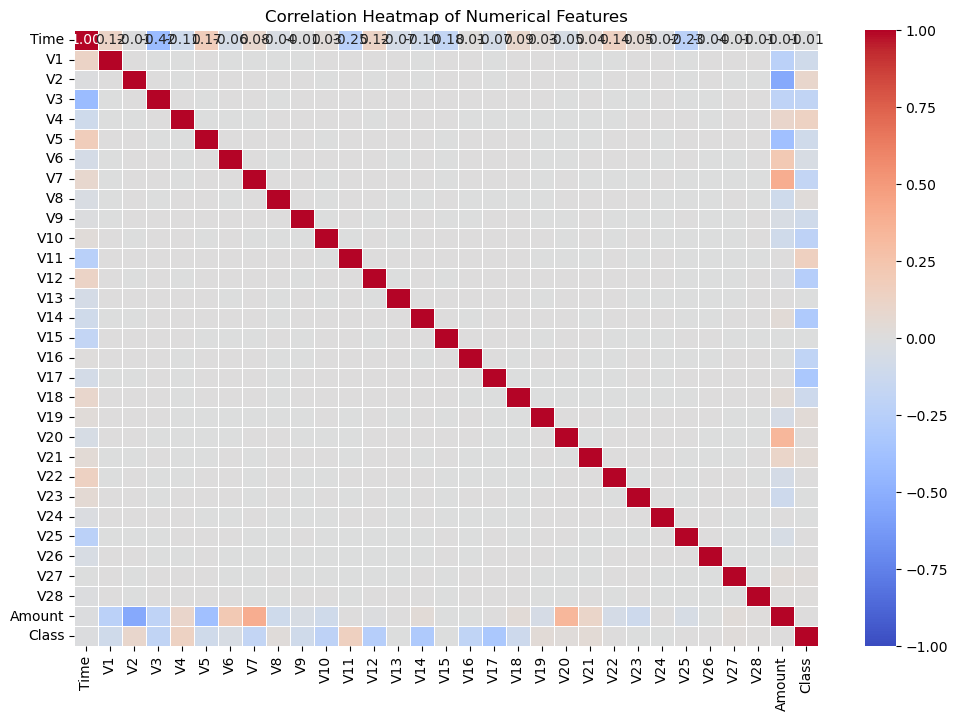

In [22]:
# Compute the correlation matrix for numerical features
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Customize the plot
plt.title("Correlation Heatmap of Numerical Features")
plt.show()